## Monty Hall Problem

See my blog post [here](https://www.harrybaines.net/blog/monty-hall-problem/) for details about the Monty Hall problem.

In the solution we use the following representation of the game:

- 0 = goat, 1 = car 
- 3 doors - 2 goats and 1 car
- e.g. player picks door 1 (index 0) which has a goat, host removes the other goat, and you switch to the car and win
- e.g. player picks door 1 which has the car, host removes a goat, and you switch to the goat and lose
- e.g. doors = [1, 0, 0]
- e.g. doors = [0, 1, 0]
- e.g. doors = [0, 0, 1]

In [1]:
# Import dependencies
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Run a monty hall simulation 'games' times, with an option to switch doors
def monty_hall(games=100000, switching=True):
    wins = 0
    for i in range(games):
        doors = [0] * 3
        chosen_door_ind = random.randint(0,2)
        car_ind = random.randint(0,2)
        doors[car_ind] = 1
        
        if switching:
            del doors[chosen_door_ind]
            doors.remove(0)
            wins += doors[0] == 1
        else:
            wins += doors[chosen_door_ind] == 1
        
    perc_won = (wins/games) * 100
    perc_lost = ((games-wins)/games) * 100
    print("-"*75)
    print("Played {:,} games and switching = {}".format(games, switching))
    print("Won {:,} games ({}%), lost {:,} games ({}%)".format(wins, perc_won, games-wins, perc_lost))
    print("-"*75)
    return wins, games-wins

In [3]:
# Plot the results of 'games' number of monty hall simulations
def plot_results(wins, losses, games, switching):
    x = ['Wins', 'Losses']
    g = [wins, losses]
    x_pos = np.arange(len(x))
    plt.bar(x_pos, g, color='#4579cb',align='center')
    plt.ylabel('Number of Games')
    plt.ylim(0, games)
    plt.title('Monty Hall ({:,} games, switching = {})'.format(games, switching))
    plt.xticks(x_pos, x)
    plt.show()

---------------------------------------------------------------------------
Played 100,000 games and switching = True
Won 66,680 games (66.67999999999999%), lost 33,320 games (33.32%)
---------------------------------------------------------------------------


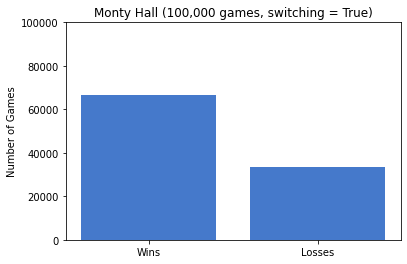

In [5]:
# Run the code
games = 100_000
switching = True
wins, losses = monty_hall(games, switching)
plot_results(wins, losses, games, switching)

From the previous plot we notice that switching tends to result in more wins than losses over a large number of games.

### References
- Monty Hall Problem Wikipedia: https://en.wikipedia.org/wiki/Monty_Hall_problem
- Python Programmer YouTube video: https://www.youtube.com/watch?v=OKp3bYiKGrc